In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Load dataset (update file name/path if needed)
df = pd.read_csv("marketing_sales.csv")

# Preview data
df.head()


,TV,Radio,Social_Media,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            30 non-null     float64
 1   Radio         30 non-null     float64
 2   Social_Media  30 non-null     float64
 3   Sales         30 non-null     float64
dtypes: float64(4)
memory usage: 1.1 KB


In [5]:
df.describe()


,TV,Radio,Social_Media,Sales
count,30.000000,30.000000,30.000000,30.000000
mean,137.036667,24.186667,37.663333,14.283333
std,89.107566,14.386074,25.945706,5.278197
min,8.600000,2.100000,1.000000,4.800000
25%,63.250000,13.425000,19.200000,9.875000
50%,145.100000,23.950000,25.200000,13.900000
75%,217.475000,36.225000,55.200000,18.375000
max,281.400000,48.900000,114.000000,24.400000


In [6]:
# Correlation matrix
correlation_matrix = df.corr()

correlation_matrix


,TV,Radio,Social_Media,Sales
TV,1.000000,-0.106758,-0.159078,0.916263
Radio,-0.106758,1.000000,0.648448,0.224629
Social_Media,-0.159078,0.648448,1.000000,0.039223
Sales,0.916263,0.224629,0.039223,1.000000


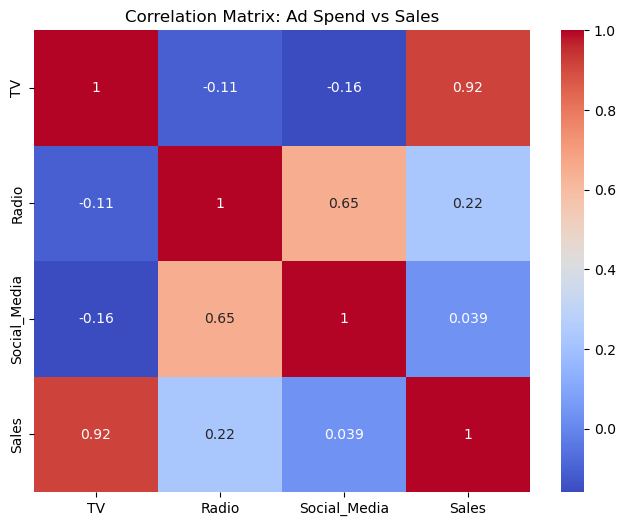

In [7]:
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix: Ad Spend vs Sales")
plt.show()


In [8]:
tv_sales_corr = df["TV"].corr(df["Sales"])
print("Correlation between TV Ad Spend and Sales:", tv_sales_corr)


Correlation between TV Ad Spend and Sales: 0.9162634524585486


In [14]:
ad_columns = ["TV", "Radio", "Social_Media"]

for col in ad_columns:
    print(f"Correlation between {col} and Sales:", df[col].corr(df["Sales"]))


Correlation between TV and Sales: 0.9162634524585486
Correlation between Radio and Sales: 0.22462921652861037
Correlation between Social_Media and Sales: 0.03922286857212093


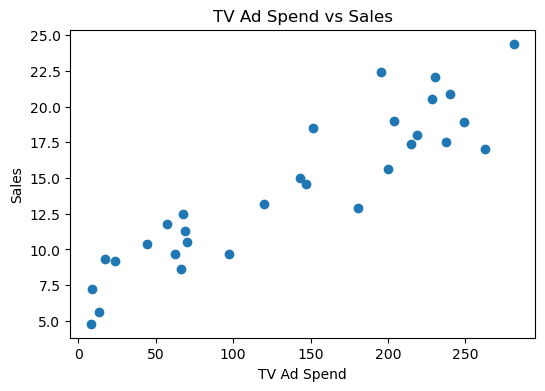

In [11]:
plt.figure(figsize=(6,4))
plt.scatter(df["TV"], df["Sales"])
plt.xlabel("TV Ad Spend")
plt.ylabel("Sales")
plt.title("TV Ad Spend vs Sales")
plt.show()


In [12]:
from sklearn.linear_model import LinearRegression

X = df[["TV"]]   # Independent variable
y = df["Sales"]  # Dependent variable

model = LinearRegression()
model.fit(X, y)

print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_[0])


Intercept: 6.845812431901072
Coefficient: 0.054273947858959344


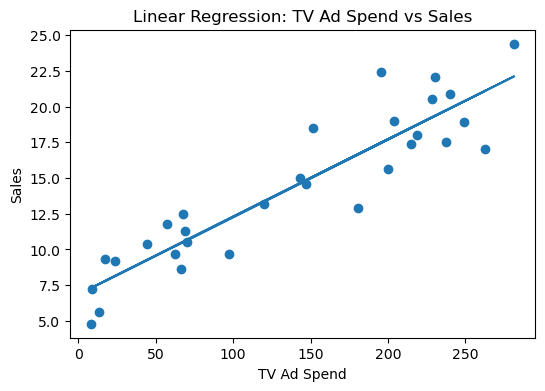

In [13]:
plt.figure(figsize=(6,4))
plt.scatter(df["TV"], df["Sales"])
plt.plot(df["TV"], model.predict(X))
plt.xlabel("TV Ad Spend")
plt.ylabel("Sales")
plt.title("Linear Regression: TV Ad Spend vs Sales")
plt.show()


### Correlation vs Causation

Although ad spend and sales show a positive correlation, this does not prove that advertising causes increased sales. 
Possible confounding variables include seasonality, market demand, pricing strategies, brand awareness, and economic conditions.
Controlled experiments or causal inference methods are needed to establish causality.
